# Implementation of clustering algorithms

Build K-Means and Agglomerative Clustering models to perform an unsupervised clustering by using given data. Follow below steps as a guideline for building your model and explain each of them in code lines. 

* Data cleaning (25 points)

Start with data cleaning to ensure that your data is correct, consistent and usable. The techniques used for data cleaning may vary but you can consider to follow these basic steps: handling missing values, encoding categorical features, extracting useful features by using existing features, handling outliers etc.

* Data Preprocessing (25 points)

In this step you should transform raw data into an understandable format for machine learning algorithms. This step may include scaling the features, performing dimensionality reduction etc.

* Clustering (30)

The goal of this step is to find distinct groups or “clusters” within a data set by using K-Means and Agglomerative Clustering Algorithms. Apply Elbow Method to determine the number of clusters. After building models, examine and comment the clusters formed via scatter plot.

* Silhouette Scores (20)

To evaluate how “well clustered” data points are, use the “silhouette score” and plot the Silhouette Scores for all of data points.

Note: Don't forget to explain your codes and comment on the obtained result.

# IMPORT LIBRARIES AND READ DATA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples 

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read the "data.csv" file as DataFrame object.
data = pd.read_csv("data.csv")

# Print shape of the DataFrame.
print("Shape of the DataFrame:", data.shape)

# Print first 5 tuples of the DataFrame.
data.head()

Shape of the DataFrame: (1001, 30)


,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


# Data Cleaning and Preprocessing

In [ ]:
# Drop unnecessary columns according to "DataDictionary.txt" file.
data = data.drop(['Unnamed: 0', 'ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis = 1)

# Print the first 5 tuples of the updated DataFrame.
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0


In [ ]:
# Print DataFrame info to detect categorical columns and null values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           1001 non-null   int64  
 1   Education            1001 non-null   object 
 2   Marital_Status       1001 non-null   object 
 3   Income               988 non-null    float64
 4   Kidhome              1001 non-null   int64  
 5   Teenhome             1001 non-null   int64  
 6   Recency              1001 non-null   int64  
 7   MntWines             1001 non-null   int64  
 8   MntFruits            1001 non-null   int64  
 9   MntMeatProducts      1001 non-null   int64  
 10  MntFishProducts      1001 non-null   int64  
 11  MntSweetProducts     1001 non-null   int64  
 12  MntGoldProds         1001 non-null   int64  
 13  NumDealsPurchases    1001 non-null   int64  
 14  NumWebPurchases      1001 non-null   int64  
 15  NumCatalogPurchases  1001 non-null   i

In [ ]:
# Fill NaN values of Income with median, because mean can easily affect by outliers.
data['Income'].fillna(data['Income'].median(), inplace = True)

# Check NaN values deleted.
data['Income'].isnull().sum()

0

In [ ]:
# Check the object columns categories.
print(data['Education'].unique())
print(data['Marital_Status'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone']


In [ ]:
# Create a dict for mapping the categories to numerical values.
mapping = {
           'Education': {'Basic': 0, 'Graduation': 1, 'PhD': 2, 'Master': 3, '2n Cycle': 4},
           'Marital_Status': {'Alone': 0, 'Single': 1, 'Together': 2, 'Married': 3, 'Divorced': 4, 'Widow': 5}
          }

# Replace the categories with numeric values.
data = data.replace(mapping)

# Print first 10 tuples of the DataFrame.
data.head(10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,1,1,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,1,1,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,1,2,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,1,2,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,2,3,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0
5,1967,3,2,62513.0,0,1,16,520,42,98,...,4,10,6,0,0,0,0,0,0,0
6,1971,1,4,55635.0,0,1,34,235,65,164,...,3,7,6,0,0,0,0,0,0,0
7,1985,2,3,33454.0,1,0,32,76,10,56,...,0,4,8,0,0,0,0,0,0,0
8,1974,2,2,30351.0,1,0,19,14,0,24,...,0,2,9,0,0,0,0,0,0,1
9,1950,2,2,5648.0,1,1,68,28,0,6,...,0,0,20,1,0,0,0,0,0,0


In [ ]:
# Extract useful features from exist features.
data.insert(0, 'Age', 2021 - data['Year_Birth'])
data = data.drop('Year_Birth', axis = 1)

data.insert(4, 'Child', data.iloc[:, 4:6].sum(axis = 1))
data = data.drop(['Kidhome', 'Teenhome'], axis = 1)

data.insert(6, 'Spent', data.iloc[:, 6:12].sum(axis = 1))
data = data.drop(data.iloc[:, 7:13], axis = 1)

data.head()

,Age,Education,Marital_Status,Income,Child,Recency,Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,64,1,1,58138.0,0,58,1617,3,8,10,4,7,0,0,0,0,0,0,1
1,67,1,1,46344.0,2,38,27,2,1,1,2,5,0,0,0,0,0,0,0
2,56,1,2,71613.0,0,26,776,1,8,2,10,4,0,0,0,0,0,0,0
3,37,1,2,26646.0,1,26,53,2,2,0,4,6,0,0,0,0,0,0,0
4,40,2,3,58293.0,1,94,422,5,5,3,6,5,0,0,0,0,0,0,0


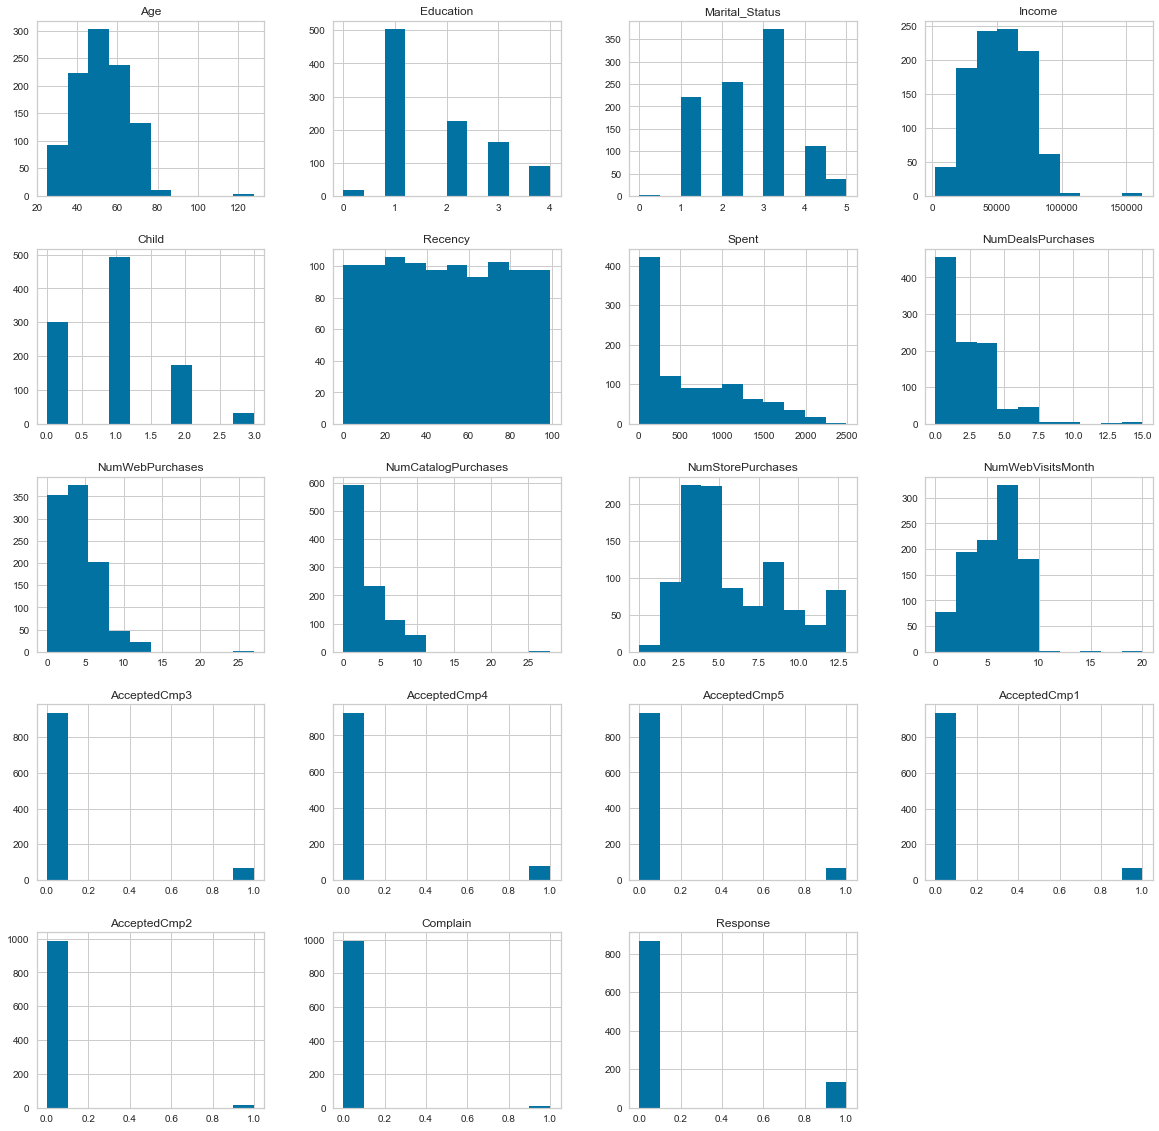

In [ ]:
# Print histogram for visualize the distributions of the columns.
histograms = data.hist(figsize = (20, 20))

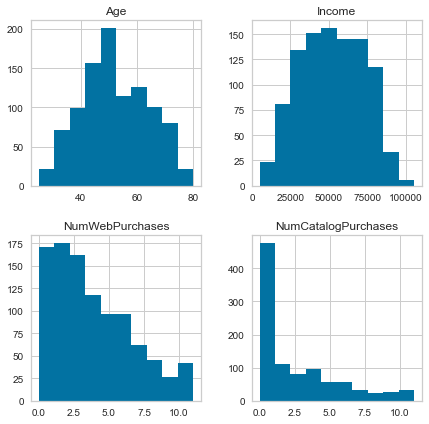

In [ ]:
# I detected outliers with using histograms, I will delete them because they are too few.
data = data.drop(data[data['Age'] > 100].index)
data = data.drop(data[data['Income'] > 120000].index)
data = data.drop(data[data['NumWebPurchases'] > 15].index)
data = data.drop(data[data['NumCatalogPurchases'] > 15].index)

# Check histograms after delete outliers.
new_histograms = data[['Age', 'Income', 'NumWebPurchases', 'NumCatalogPurchases']].hist(figsize = (7,7))

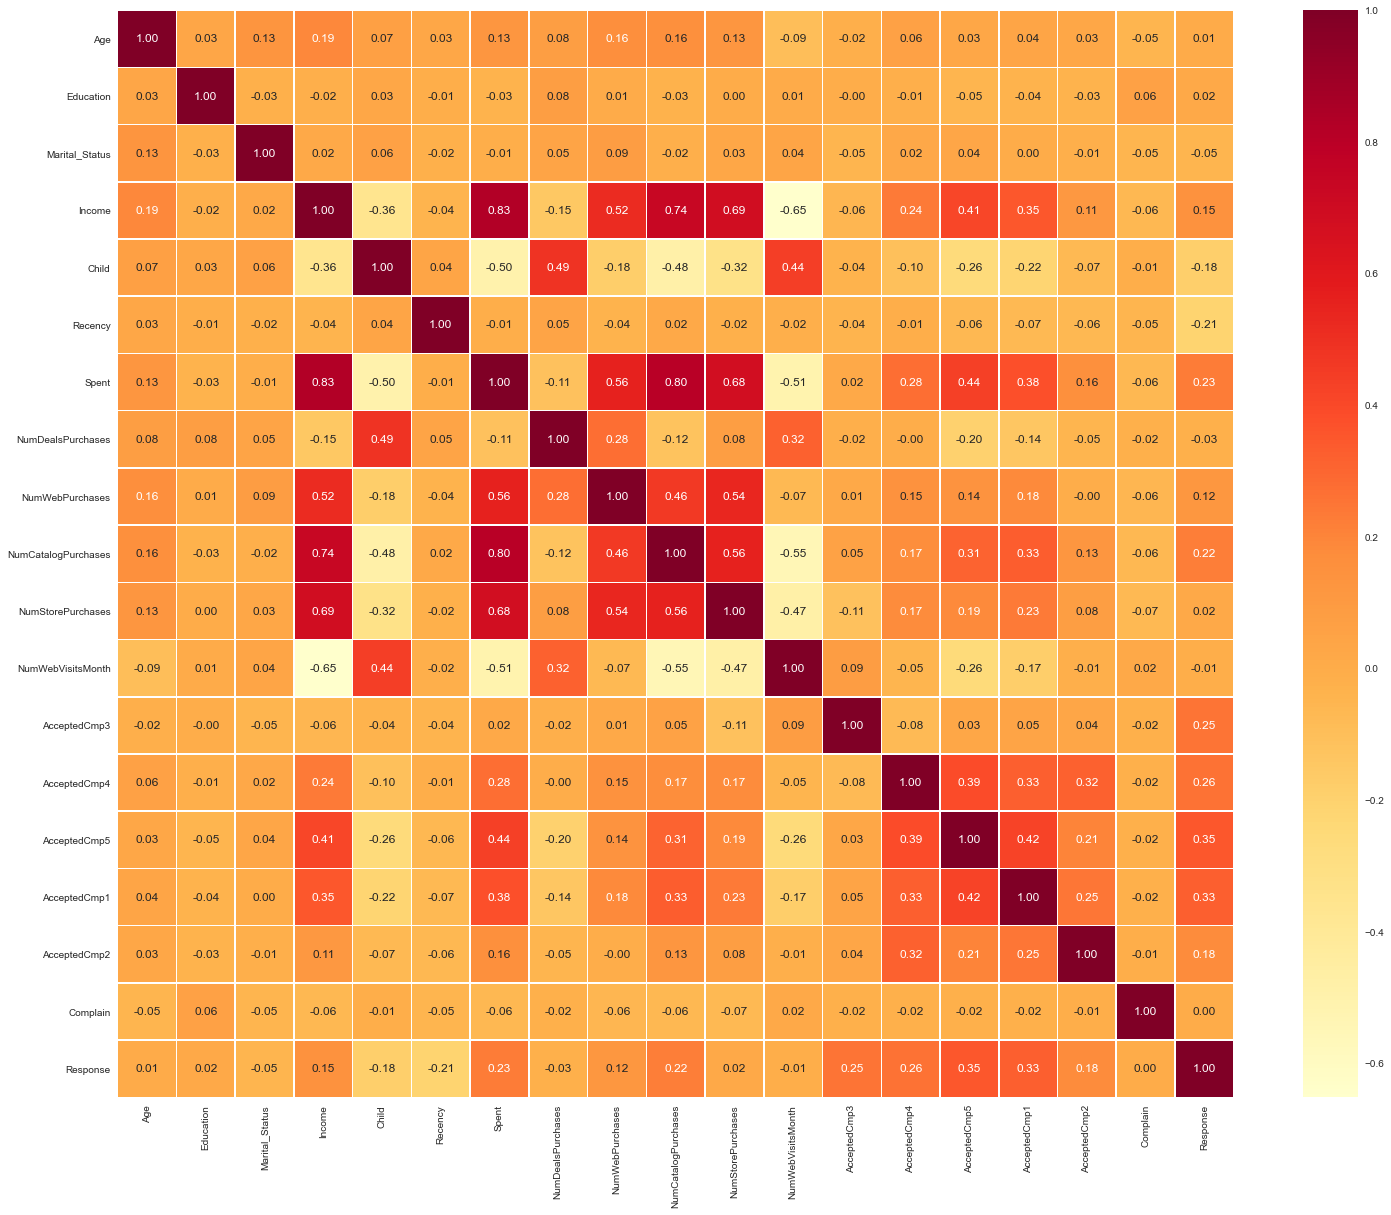

In [ ]:
# Plot correlation heatmap for determine the relationships of the columns.
plt.figure(figsize = (25,20))
corr_heatmap = sns.heatmap(data.corr(), cmap = 'YlOrRd', annot = True, linewidth = .5, fmt = '.2f')
plt.show()

In [ ]:
# I will use MinMaxScaler to normalize the data.

# Create an instance of MinMaxScaler.
min_max_scaler = MinMaxScaler()

# Fit, then transform the data.
scaled = min_max_scaler.fit_transform(data)

# Return DataFrame again.
data_scaled = pd.DataFrame(scaled, columns = data.columns)

# Print first 5 tuples of the DataFrame.
data_scaled.head()

,Age,Education,Marital_Status,Income,Child,Recency,Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0.709091,0.25,0.2,0.529540,0.000000,0.585859,0.649597,0.200000,0.727273,0.909091,0.307692,0.35,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.763636,0.25,0.2,0.412315,0.666667,0.383838,0.008468,0.133333,0.090909,0.090909,0.153846,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.563636,0.25,0.4,0.663473,0.000000,0.262626,0.310484,0.066667,0.727273,0.181818,0.769231,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.218182,0.25,0.4,0.216529,0.333333,0.262626,0.018952,0.133333,0.181818,0.000000,0.307692,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.272727,0.50,0.6,0.531080,0.333333,0.949495,0.167742,0.333333,0.454545,0.272727,0.461538,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Dimensionality Reduction with Principal Component Analysis.
print("""A principal component is a linear combination of the original variables.
Principal components are extracted in such a way that the first principal component explains maximum variance in the dataset.
Second principal component tries to explain the remaining variance in dataset and uncorrelated to first principal component.
""")

# Create an instance of PCA
pca = PCA(n_components=2)

# Fit, then transform data into 2 column.
pca_data = pd.DataFrame(pca.fit_transform(data_scaled), columns = ["PC1", "PC2"])

# Print the firt 5 tuples of the DataFrame.
pca_data.head()

A principal component is a linear combination of the original variables.
Principal components are extracted in such a way that the first principal component explains maximum variance in the dataset.
Second principal component tries to explain the remaining variance in dataset and uncorrelated to first principal component.



,PC1,PC2
0,0.798613,0.297563
1,-0.511208,0.117804
2,0.278863,-0.302567
3,-0.472405,0.160682
4,-0.126803,-0.300097


# Clustering

## 1) KMeans Clustering

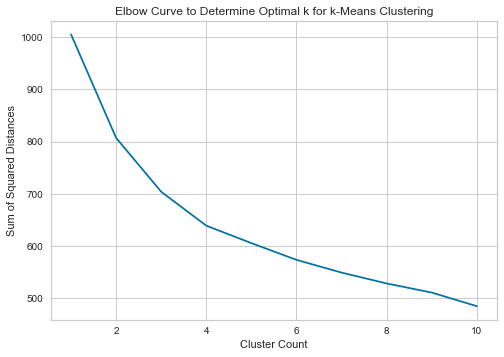

In [ ]:
# Elbow Curve for determine the optimal cluster count for k-Means Clustering.

# Create a dict for cluster count - inertia pairs.
cluster_dict = {}

# Create a loop for reach different cluster counts.
for cluster in range(1,11):
    # Create an instance of KMeans Cluster.
    km = KMeans(n_clusters = cluster, random_state = 0)
    # Fit the instance with normalized data.
    km.fit(data_scaled)
    # Add cluster - inertia pairs to dict
    cluster_dict[cluster] = km.inertia_

# Plot the graph for determine optimal cluster count.
plt.plot(cluster_dict.keys(), cluster_dict.values(), 'bx-')
plt.xlabel('Cluster Count')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Curve to Determine Optimal k for k-Means Clustering')
plt.show()

#### According to Elbow Method, I decided cluster count as 4.

In [ ]:
# Create an instance of KMeans.
k_means = KMeans(n_clusters = 4)

# Fit the scaled data.
k_means.fit(data_scaled)

KMeans(n_clusters=4)

#### Now I will plot scatter plots of all columns according to choosed column which is Income column, then I will decide 1 column to plot. 

In [ ]:
# Create a KMeans label in the data.
cluster_label = k_means.labels_
data['KMeans'] = cluster_label

# Print first 5 tuples of the updated DataFrame.
data.head()

,Age,Education,Marital_Status,Income,Child,Recency,Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,KMeans
0,64,1,1,58138.0,0,58,1617,3,8,10,4,7,0,0,0,0,0,0,1,3
1,67,1,1,46344.0,2,38,27,2,1,1,2,5,0,0,0,0,0,0,0,2
2,56,1,2,71613.0,0,26,776,1,8,2,10,4,0,0,0,0,0,0,0,0
3,37,1,2,26646.0,1,26,53,2,2,0,4,6,0,0,0,0,0,0,0,2
4,40,2,3,58293.0,1,94,422,5,5,3,6,5,0,0,0,0,0,0,0,0


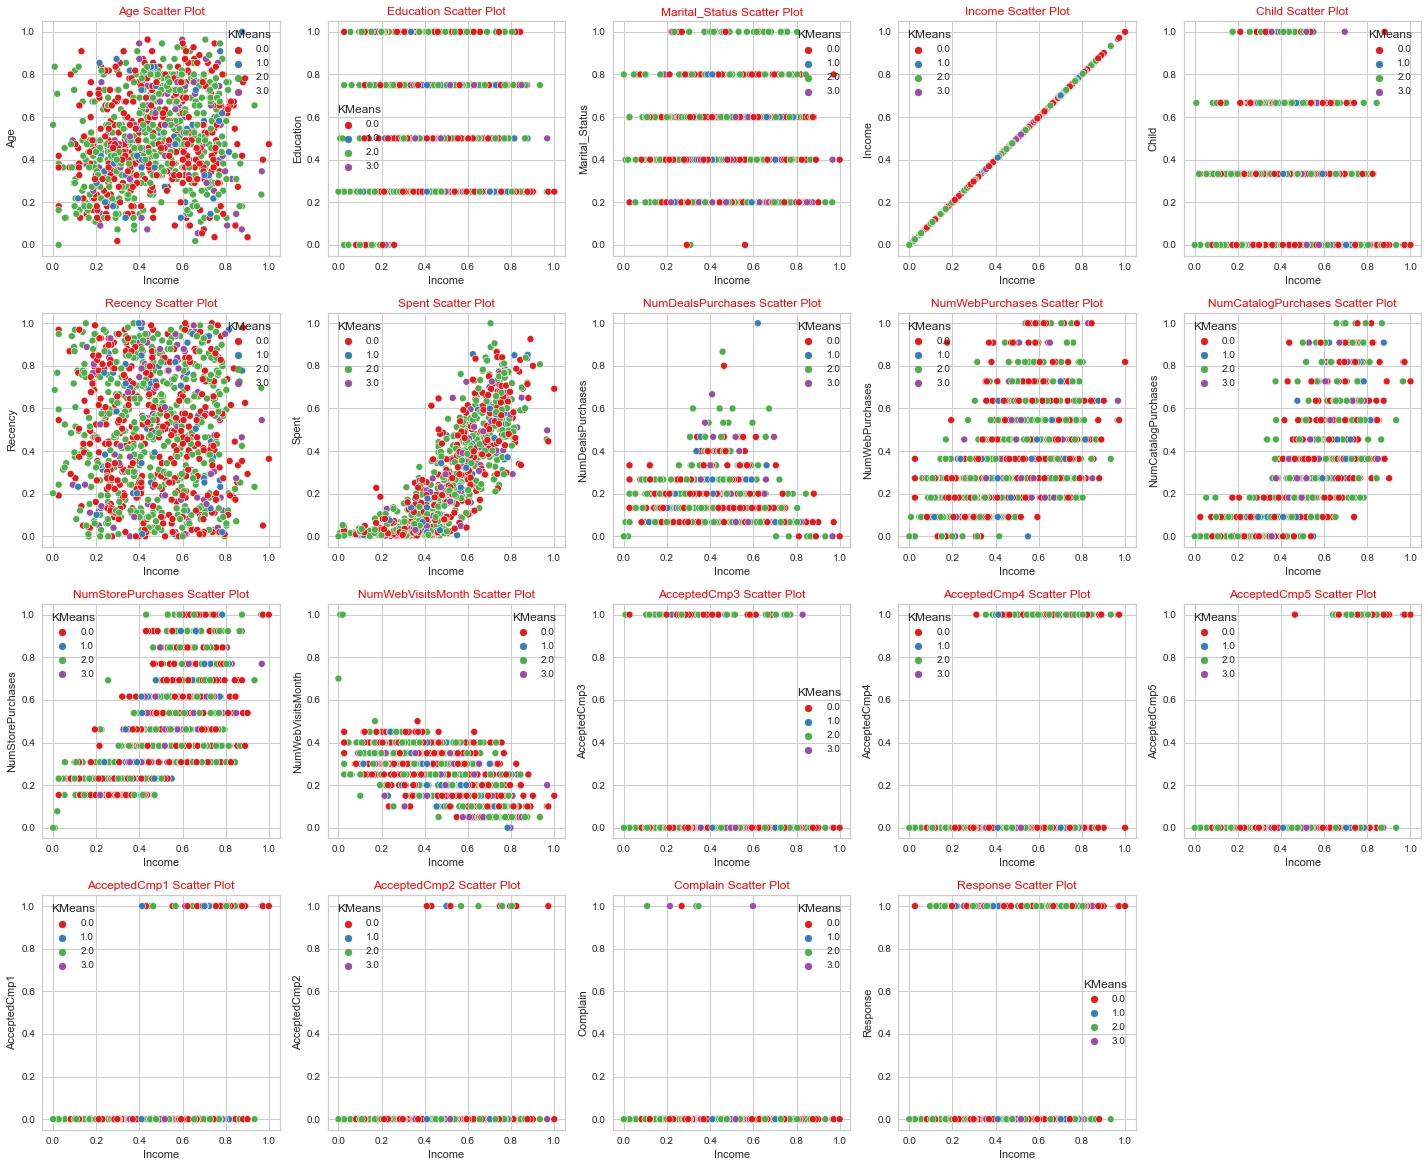

In [ ]:
# Create figure which size is 20 x 20.
figure = plt.figure(figsize = (20,20))

# Choose columns for plot the scatters.
scatter_columns = ['Age', 'Education', 'Marital_Status', 'Income', 'Child', 'Recency',
       'Spent', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response',]

# Enumerate columns, then plot subplots of the columns.
for i, col in enumerate(scatter_columns):
    axis = figure.add_subplot(5, 5, i+1)
    sns.scatterplot(x = data_scaled['Income'], y = data_scaled[col], hue = data['KMeans'], palette = 'Set1')
    axis.set_title(col + " Scatter Plot", color = 'red')
    plt.ylabel(col)

# Show the figure.
figure.tight_layout()

#### I decided to use Spent column. I choose randomly because it seems nice than others. Now I will create a sample with Income and Spent column. This operation can consider as dimensionality reduction for clustering.

In [ ]:
# Take sample from scaled data.
sample_df = data_scaled[['Income', 'Spent']]

# Print first 5 tuples of the sample DataFrame.
sample_df.head()

,Income,Spent
0,0.529540,0.649597
1,0.412315,0.008468
2,0.663473,0.310484
3,0.216529,0.018952
4,0.531080,0.167742


#### At this step I will use PCA and Sample data set, so I will create 2 different cluster plot with 4 cluster which decided at Elbow Method.

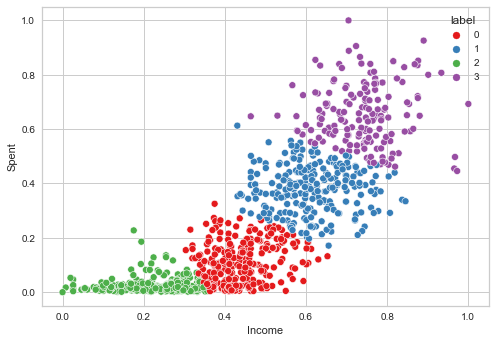

In [ ]:
# Create an instance of KMeans Cluster with 4 cluster, then fit it with Sample DataFrame.
k_mean_sample = KMeans(n_clusters = 4)
k_mean_sample.fit(sample_df)

# Take labels from cluster, then add this label to DataFrame.
sample_label = k_mean_sample.labels_
sample_df['label'] = sample_label

# Plot the clusters of Sample DataFrame.
sns.set_palette('Set2')
sample_scatter = sns.scatterplot(sample_df['Income'], sample_df['Spent'], hue = sample_df['label'], palette = 'Set1')

#### Sample DataFrame's Clusters seems nice.
#### All the clusters clustered successfully in my view.
#### All these clusters intracluster and intercluster distance are low.
#### All clusters have low variance and standart deviation in my opinion.
#### According to clusters Spent and Income has a really powerful relationship.
#### According to these customers segments; who has bigger Income, he/she can spent a more.
#### All Clusters are dense.
#### Because of the intercluster distance, all clusters can considered as little bit unsuccessfull but thats not affect the result much.
#### As a result, I can say these clusters are successfull and the score of the clusters can 0.70 - 0.90 bound.

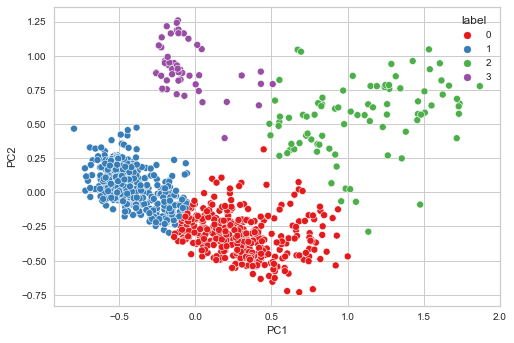

In [ ]:
# Create an instance of KMeans Cluster with 4 cluster, then fit with PCA DataFrame
k_mean_pca = KMeans(n_clusters = 4)
k_mean_pca.fit(pca_data)

# Create label for PCA DataFrame then add it to DataFrame.
pca_label = k_mean_pca.labels_
pca_data['label'] = pca_label

# Show the Clusters of PCA DataFrame.
sns.set_palette('Set2')
pca_scatter = sns.scatterplot(pca_data['PC1'], pca_data['PC2'], hue = pca_data['label'], palette = 'Set1')

#### PCA Data Clusters seems worst than Sample Data Clusters.
#### Variance and Standart Deviation of Bottom Clusters are low, Upper Clusters are high.
#### Intracluster of Bottom Clusters are low, Upper Clusters are high.
#### Intercluster of Bottom Clusters are low, Upper Clusters are high.
#### Upper Clusters seem unsuccessfull because their data point are far away and seems like 2 different cluster.
#### Bottom Clusters seem successfull because their data point are close to each other.
#### According to Clusters we can't say direct relationship between components.
#### Upper Clusters are sparse, Bottom Clusters are dense.
#### As a result, I can say these clusters are not unsuccessfull, and the score of the clusters can be 0.60 - 0.80 bound.

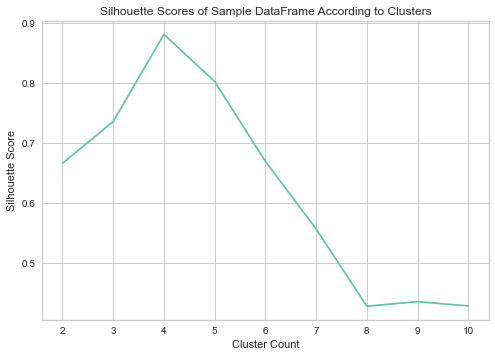

In [ ]:
# Create a list for hold silhouette scores.
silhouette_scores = []

# Test the score with different clusters for Sample DataFrame.
for n_clusters in range(2,11):
    # Create an instance with n cluster.
    cluster = KMeans(n_clusters=n_clusters)
    # Fit then predict with Sample DataFrame.
    a = cluster.fit_predict(sample_df)
    # Calculate the score, then append to list
    silhouette_scores.append(silhouette_score(sample_df, a))

# Plot the line plot.
plt.plot(range(2,11), silhouette_scores)
plt.title("Silhouette Scores of Sample DataFrame According to Clusters")
plt.xlabel("Cluster Count")
plt.ylabel("Silhouette Score")
plt.show()

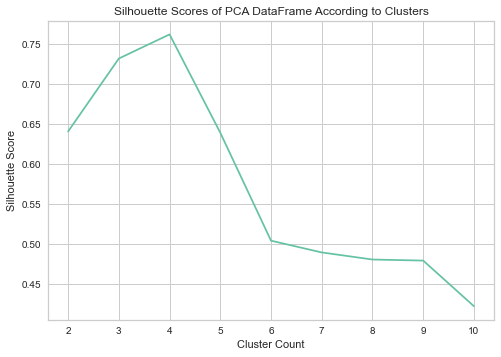

In [ ]:
# Create a list for hold silhouette scores.
silhouette_scores = []

# Test the score with different clusters for PCA DataFrame.
for n_clusters in range(2,11):
    # Create an instance with n cluster.
    cluster = KMeans(n_clusters=n_clusters)  
    # Fit the data, then predict with PCA Data.
    a = cluster.fit_predict(pca_data)
    # Calculate the score at this step.
    silhouette_scores.append(silhouette_score(pca_data, a))
    
# Plot the line plot of silhouette scores for PCA DataFrame.
plt.plot(range(2,11), silhouette_scores)
plt.title("Silhouette Scores of PCA DataFrame According to Clusters")
plt.xlabel("Cluster Count")
plt.ylabel("Silhouette Score")
plt.show()

#### As I said at the Elbow Step, both of the clusters take maximum score at the 4.
#### As I said at Scatter Plot Step, Sample Data's Clusters has ~0.85 score.
#### As I said at Scatter Plot Step, PCA Data's Clusters has ~0.76 score.
#### Both of the graphs have negative and positive slopes but both of them reach global maximum at 4. 
#### Both of the clusters are successfull but the Sample's clusters are more successfull than PCA at 4 cluster.

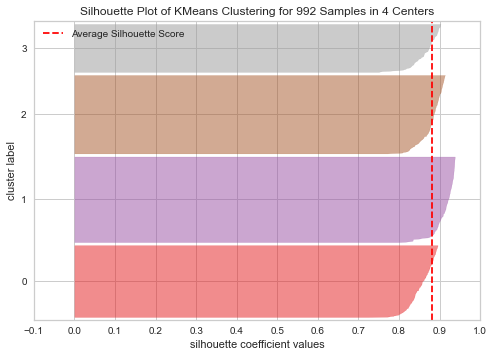

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 992 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Plot Silhouette Score for each data point at Sample data.

km_sample = KMeans(n_clusters = 4)   # Create an KMeans instance with 4 cluster
visualizer = SilhouetteVisualizer(km_sample)   # Create Silhouette Visualizer instance with Sample DataFrame.

visualizer.fit(sample_df)   # Fit the visualizer with Sample DataFrame.
visualizer.poof()   # Poof and plot the visualizer.

#### As I said at the Scatter Plot step, all clusters data points distributed nearly equally.
#### Each cluster has nearly equal data point count in the cluster.
#### Data points distributions seems nicely.
#### I can say the Intracluster distance of each cluster is too small.
#### Nearly all clusters density's are high.
#### All clusters have big Silhouette Score

<bound method Visualizer.poof of SilhouetteVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=4))>

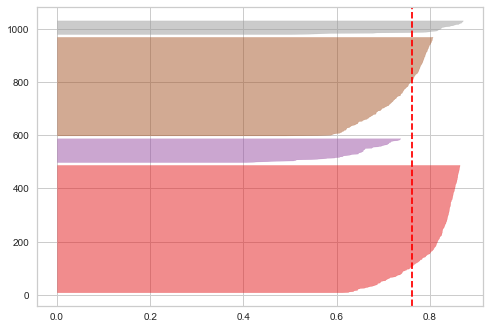

In [ ]:
# Plot silhouette score for each data point at PCA data.

km_pca = KMeans(n_clusters = 4)   # Create an instance with 4 cluster for KMeans.
visualizer = SilhouetteVisualizer(km_pca)   # Create an instance of Silhouette Visualizer.

visualizer.fit(pca_data)   # Fit the PCA data.
visualizer.poof   # Poof then plot the visualizer.

#### As I said at Scatter plot step, two cluster has more data points and distributed nicely.
#### The data point distribution not equal.
#### PCA Data has lower Silhouette Score than Sample Data.
#### Two of the clusters which area is large Intracluster distance is small, other two's is large.
#### Two of the clusters which area is large are more density than other two's.

## 2) Agglomerative Clustering

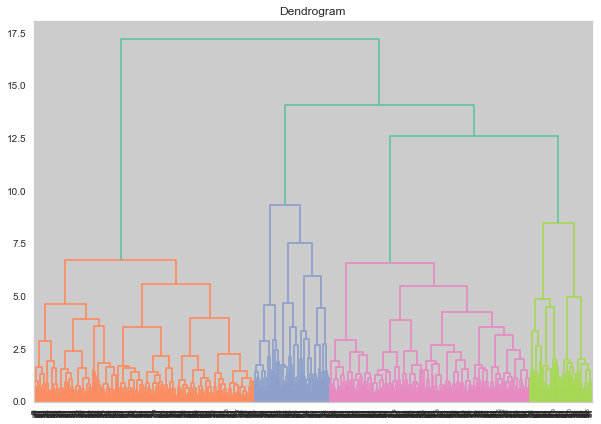

In [ ]:
# Create a Dendrogram for choose the optimal cluster value for Agglomerative Clustering.

# Plot Dendrogram.
plt.figure(figsize = (10, 7))
plt.title('Dendrogram')
dendrogram = shc.dendrogram(shc.linkage(data_scaled, method = 'ward'))

#### According to dendrogram, maximum horizontal distance is at 12. I choose y = 12 as my axis, then plot line. There are 4 line intersect with my horizontal line so I decided to optimal cluster count as 4.

#### At this step I will use PCA and Sample data set, so I will create 2 different cluster plot with 4 cluster which decided at Dendrogram.

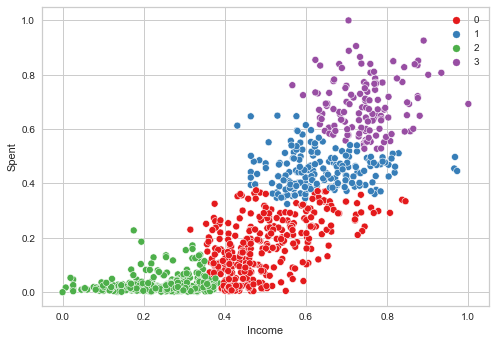

In [ ]:
# Create Agglomerative Cluster with 4 cluster in euclidean affinity with ward linkage.
agg_cluster_sample = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

# Fit model, then predict on the data.
sample_prediction = agg_cluster_sample.fit_predict(sample_df.iloc[:, 0:2])

# Plot the clusters of Sample DataFrame
sns.scatterplot(x=sample_df['Income'], y=sample_df['Spent'], hue = sample_prediction, palette = 'Set1')
plt.show()

#### Sample DataFrame's Clusters seems nice.
#### All the clusters clustered successfully in my view.
#### All these clusters intracluster and intercluster distance are low.
#### All clusters have low variance and standart deviation in my opinion.
#### According to clusters Spent and Income has a really powerful relationship.
#### According to these customers segments; who has bigger Income, he/she can spent a more.
#### All clusters are dense.
#### Because of the intercluster distance, all clusters can considered as little bit unsuccessfull but thats not affect the result much.
#### This plot has little differences from KMeans Sample DataFrame Clusters.
#### If I will give an example the data clusters which close to x = 1 axis is belong to top cluster at KMeans but in Agglomerative it belongs to 3rd cluster from bottom.
#### As a result, I can say these clusters are successfull and the score of the clusters can 0.70 - 0.90 bound.

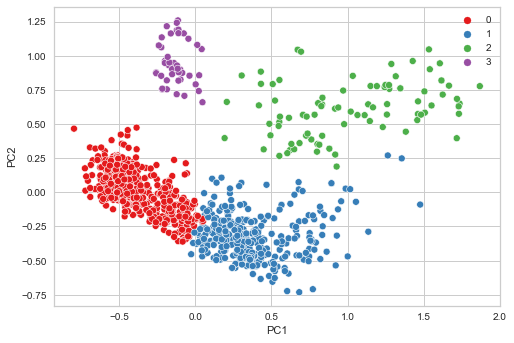

In [ ]:
# Create Agglomerative Cluster with 4 cluster in euclidean affinity with ward linkage.
agg_cluster_pca = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

# Fit model, then predict on the PCA data.
pca_prediction = agg_cluster_pca.fit_predict(pca_data.iloc[:, 0:2])

# Plot the clusters of PCA DataFrame
sns.scatterplot(x=pca_data['PC1'], y=pca_data['PC2'], hue = pca_prediction, palette = 'Set1')
plt.show()

#### PCA Data Clusters seems worst than Sample Data Clusters.
#### Variance and Standart Deviation of Bottom Left Cluster is low, Upper Clusters and Bottom Right are high.
#### Intracluster of Bottom Left Cluster is low, Upper Clusters and Bottom right are high.
#### Intercluster of Bottom Clusters are low, Upper Clusters are high.
#### Upper Clusters and Bottom Right Cluster seem unsuccessfull because their data point are far away and seems like 2 different cluster.
#### Bottom Left Cluster seem successfull because it's data point are close to each other.
#### According to Clusters we can't say direct relationship between components.
#### The K-Means and Agglomerative of PCA Data has differences.
#### If I will give an example, the Bottom Right Cluster take data points from Upper Right Cluster in Agglomerative according to KMeans.
#### Bottom left cluster is too dense. Bottom right and upper clusters are sparse.
#### As a result, I can say these clusters are not unsuccessfull, and the score of the clusters can be 0.60 - 0.80 bound.

### NOTE : I CAN'T USE SILHOUETTE VISUALIZER FOR AGGLOMERATIVE CLUSTERING BECAUSE IT HAS NO ATTRIBUTE PREDICT, IT GIVES ERROR. SO, I JUST PLOT SILHOUETTE SCORE GRAPHS.

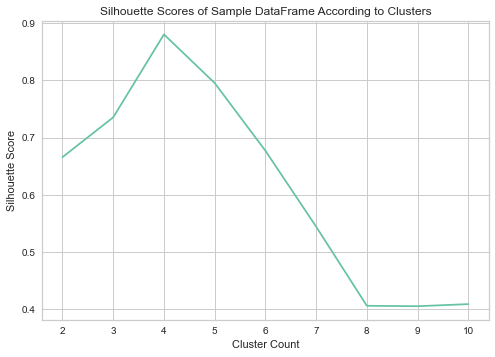

In [ ]:
# Create a list for hold silhouette scores.
silhouette_scores = []

# Test the score with different clusters for Sample DataFrame.
for n in range(2,11):
    # Create an instance with n cluster.
    cluster = AgglomerativeClustering(n_clusters = n, affinity='euclidean', linkage='ward')
    # Fit then predict with Sample DataFrame.
    a = cluster.fit_predict(sample_df)
    # Calculate the score, then append to list
    silhouette_scores.append(silhouette_score(sample_df, a))

# Plot the line plot.
plt.plot(range(2,11), silhouette_scores)
plt.title("Silhouette Scores of Sample DataFrame According to Clusters")
plt.xlabel("Cluster Count")
plt.ylabel("Silhouette Score")
plt.show()

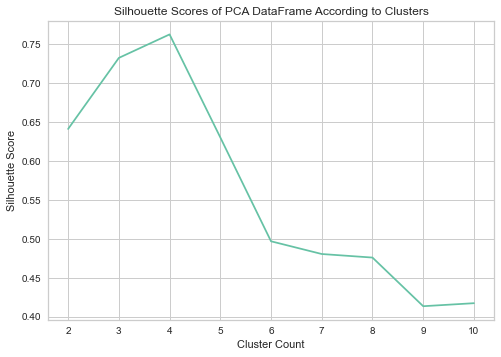

In [ ]:
# Create a list for hold silhouette scores.
silhouette_scores = []

# Test the score with different clusters for PCA DataFrame.
for n in range(2,11):
    # Create an instance with n cluster.
    cluster = AgglomerativeClustering(n_clusters = n, affinity='euclidean', linkage='ward') 
    # Fit the data, then predict with PCA Data.
    a = cluster.fit_predict(pca_data)
    # Calculate the score at this step.
    silhouette_scores.append(silhouette_score(pca_data, a))
    
# Plot the line plot of silhouette scores for PCA DataFrame.
plt.plot(range(2,11), silhouette_scores)
plt.title("Silhouette Scores of PCA DataFrame According to Clusters")
plt.xlabel("Cluster Count")
plt.ylabel("Silhouette Score")
plt.show()

#### As I said at Dendrogram Step, each data take bigger score at 4 cluster.
#### Both of the line plots has negative and positive slopes but global maximum takes bigger value at 4 cluster for both.
#### As I said at the Cluster Plot Step, the scores are close to KMeans scores.
#### As I said at the Cluster Plot Step, Sample Data's Score is ~0.87.
#### The Score of PCA Data is close to ~0.77. I expect the is lower than 0.75 but I think Bottom Left of the PCA Data Cluster has a big margin at this score.
####  Both of the clusters are successfull but the Sample's clusters are more successfull than PCA at 4 cluster.